<a href="https://colab.research.google.com/github/voronv27/Lab1/blob/main/01_datasheet_and_audit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Checkpoint A


##Data Documentation, Quality, and Leakage Audit

### Motivation/intended use:  
The motivation for using this datasheet is to predict a student's exam score given factors such as general demographics & lifestyle, and academic information (such as the course taken or hours spent studying).

###Target Definition:  
We will predict a student's score on an exam, which is a continuous value from 0 to 100.

###Data Source & License  
The data used was downloaded from https://www.kaggle.com/datasets/kundanbedmutha/exam-score-prediction-dataset  

and is under a Creative Commons license ([Attribution 4.0 International (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)).

The creator of this dataset is Kundan Sagar Bedmutha.

###Feature Dictionary  
Key features of this dataset include:  

1.   age (int)  
     The student's age, with values ranging from 17 to 24.
2.   gender (string)  
     The student's gender, with options being "male", "female", and "other".
3.   course (string)  
     The academic program the student is in (values such as "diploma", "b.sc", "b.tech")
4.   study_hours (float)  
     The daily amount of hours a student spends studying (ranges from 0 to 7.91)
5.   class_attendance (float)  
     The percentage of classes the student has attended (ranges from 40.6 to 99.4 in the dataset)
6.   internet_access (string)  
     "yes" or "no" depending on if the student has internet access
7.   sleep_hours (float)  
     The number of hours of sleep a student gets daily (ranges from 4.1 to 9.9)
8.   study_method (string)  
     The student's primary study technique (values such as "online videos", "coaching", and "self-study")



###Limitations and Risk  

1. The data is artificial, so while it should mirror real cases, there will be differences compared to if it were based on real students. The synthetic data may have biases that wouldn't be present in non-biased real-life data.
2. There are a lot of different labels in the data, such as the specific academic program the student is in and the study method used, which could lead to overfitting/bad generalization in the model.
3. Representativeness: certain values are not present in the data that may be present in the real world (for example, the daily sleep hours do not go below 4), so the model may not be able to predict a student's grade as accurately in those cases.

## Quality & Leakage Audit

In [ ]:
import pandas as pd

path = 'Exam_Score_Prediction.csv'

data = pd.read_csv(path)
data.head()

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


###Missingness Summary  
As this is synthetic data, there are no missing values:

In [ ]:
data.isna().sum()

,0
student_id,0
age,0
gender,0
course,0
study_hours,0
class_attendance,0
internet_access,0
sleep_hours,0
sleep_quality,0
study_method,0


###Duplicate Row Check  
There is no duplicate data (each student has a unique id).

In [ ]:
data[data.duplicated()]

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score


###Target Distribution
Here is the regression summary for the data:

In [ ]:
import statsmodels.api as sm
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# separate features (x) from label (y)
label_col = "exam_score"
assert label_col in data.columns, f"Label column {label_col} not in data"

x = data.drop(columns=[label_col])
y = data[label_col]

# need to one-hot encode the categories for the linear model
num_cols = [c for c in x.columns if x[c].dtype != 'object']
cat_cols = [c for c in x.columns if x[c].dtype == 'object']
categorical_tf = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown='ignore'))
])
preprocess = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_cols),
        ("cat", categorical_tf, cat_cols)
    ]
)

x_transformed = preprocess.fit_transform(x)
x_transformed = sm.add_constant(x_transformed)

model = sm.OLS(y, x_transformed)
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             exam_score   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     2276.
Date:                Thu, 29 Jan 2026   Prob (F-statistic):               0.00
Time:                        15:23:45   Log-Likelihood:                -73994.
No. Observations:               20000   AIC:                         1.480e+05
Df Residuals:                   19975   BIC:                         1.482e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6300      0.239      6.808      0.000       1.161       2.099
x1          1.485e-09    1.2e-05      0.000      1.000   -2.35e-05    2.35e-05
x2            -0.0104      0.030     -0.343      0.732      -0.070       0.049
x3             5.8966      0.030    196.490      0.000       5.838       5.955
x4             0.3395      0.004     84.727      0.000       0.332       0.347
x5             1.4474      0.040     36.197      0.000       1.369       1.526
x6             0.4567      0.127      3.594      0.000       0.208       0.706
x7             0.5387      0.126      4.278      0.000       0.292       0.785
x8             0.6347      0.126      5.034      0.000       0.388       0.882
x9             0.2267      0.173      1.313      0.189      -0.112       0.565
x10            0.0453      0.173      0.262      0.793      -0.293       0.384
x11            0.2588      0.175      1.481      0.139      -0.084       0.601
x12            0.2798      0.172      1.627      0.104      -0.057       0.617
x13            0.3077      0.174      1.771      0.077      -0.033       0.648
x14            0.3236      0.172      1.883      0.060      -0.013       0.661
x15            0.1880      0.174      1.082      0.279      -0.153       0.529
x16            0.7721      0.161      4.793      0.000       0.456       1.088
x17            0.8579      0.147      5.856      0.000       0.571       1.145
x18            0.6196      0.126      4.900      0.000       0.372       0.867
x19            5.2075      0.127     41.099      0.000       4.959       5.456
x20           -4.1970      0.126    -33.337      0.000      -4.444      -3.950
x21            6.4951      0.146     44.491      0.000       6.209       6.781
x22           -1.2010      0.148     -8.140      0.000      -1.490      -0.912
x23            1.6446      0.148     11.079      0.000       1.354       1.936
x24           -2.3301      0.146    -15.971      0.000      -2.616      -2.044
x25           -2.9786      0.145    -20.545      0.000      -3.263      -2.694
x26            4.4061      0.127     34.715      0.000       4.157       4.655
x27           -3.4151      0.126    -27.055      0.000      -3.663      -3.168
x28            0.6391      0.126      5.078      0.000       0.392       0.886
x29            0.5076      0.130      3.907      0.000       0.253       0.762
x30            0.5525      0.143      3.866      0.000       0.272       0.833
x31            0.5700      0.121      4.692      0.000       0.332       0.808
==============================================================================
Omnibus:                       11.559   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               10.749
Skew:                          -0.025   Prob(JB):                      0.00463
Ku

We see an R-squared value of 0.732, and that there is high AIC/BIC, which indicates a bad fit based on the number of parameters (likely a multicollinearity issue).

###Leakage Risk
One leakage risk in the dataset is that we have student_id as a feature. This is an identifier that correlates with the target--if the model trains with this, it may just memorize ids instead of predicting based on the other columns. We will fix this issue by dropping the student_id column.

We avoid the leakage issue of preprocessing data before the split by using x_transformed for our linear model, leaving the original x untransformed to use for the split. It would be a leakage issue to use x_transformed for the split, as our one-hot encoded data is encoded on data that would be in both the training and test data. That is, the model could use unseen test data to create the categories.

# Checkpoint B

### Leakage-Safe Split
We will split the data 80/20, and will do a random split as there are no timestamps in the data (so a random split should give a good distribution for train/test).

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

### Pipeline on the Training Set

We will build a pipeline with minimal preprocessing fit on our training data x_train and y_train.

In [ ]:
num_cols = [c for c in x_train.columns if x_train[c].dtype != 'object']
cat_cols = [c for c in x_train.columns if x_train[c].dtype == 'object']

# no missing values --> no need for imputer
numeric_tf = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_tf = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_tf, num_cols),
        ("cat", categorical_tf, cat_cols),
    ]
)

### Train Baseline Model

We will train a Ridge Regression model on our data.

In [ ]:
from sklearn.linear_model import Ridge

model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("clf", Ridge(alpha=1.0))
])

model.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['student_id', 'age',
                                                   'study_hours',
                                                   'class_attendance',
                                                   'sleep_hours']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'course',
                                                   'internet_access',
                                                   'sleep_quality',
                                                   'study_method',
                                                   'facility_rating',
                                                   'exam_difficulty'])])),
                ('clf', Ridge())])

### Primary Metric on Test Set

We will use the MAE (Mean Absolute Error) metric on our test data.

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error

y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)


print(f"MAE: {mae:.3f}") # in future parts of the lab we will use MAE
print(f"RMSE: {rmse:.3f}") # print just to see the value

MAE: 7.863
RMSE: 9.773


Our MAE is 7.863, meaning our predictions differ from the actual values on average by 7.863 points. Since test scores are out of 100 points, this is

### Residual Summary



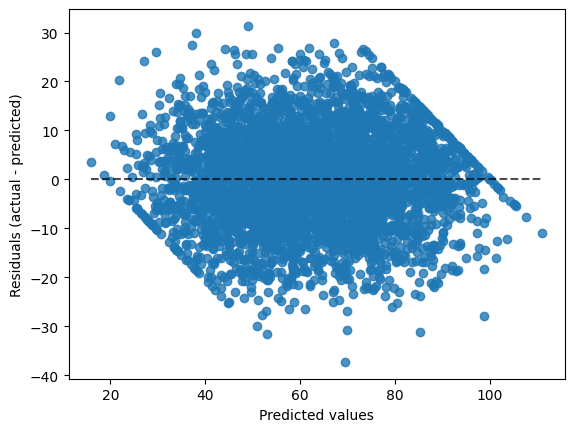

In [51]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Ridge
from sklearn.metrics import PredictionErrorDisplay

display = PredictionErrorDisplay(y_true=y_test, y_pred=y_pred)
display.plot()

plt.show()


The residual summary suggests that actual values were good predictors for expected values, as shown by most of the residual values being clustered in the [-10, 10] range. There were outliers, with the max difference being ~-38 point difference between actual and predicted. There is also a strange quirk in the residual graph that may be due to the data being sythetic. It seems like a hard boundary that the datamakers added to make the dataset realistic.